In [3]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
import graphviz
from skimage import io
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Some code from lab sheets

In [4]:
dataset = fetch_california_housing()
#
X = np.array(dataset['data'])
y = np.array(dataset['target'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [14]:
# Train two base models on the training set: a decision tree regressor and a linear regression model
base_model_1 = DecisionTreeRegressor().fit(X_train, y_train)
base_model_2 = LinearRegression().fit(X_train, y_train)

# Use the StackingRegressor to combine the predictions of the base models using a linear regression meta-model
meta_model = LinearRegression()
stacking_model = StackingRegressor(estimators=[('dt', base_model_1), ('lr', base_model_2)], final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

# Evaluate the performance of the stacking model on the test set
train_score = stacking_model.score(X_train, y_train)
test_score = stacking_model.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.9054939779528323
Test score: 0.7187417506360869


In [6]:
stacking_model.get_params()

{'cv': None,
 'estimators': [('dt', DecisionTreeRegressor()), ('lr', LinearRegression())],
 'final_estimator__copy_X': True,
 'final_estimator__fit_intercept': True,
 'final_estimator__n_jobs': None,
 'final_estimator__normalize': 'deprecated',
 'final_estimator__positive': False,
 'final_estimator': LinearRegression(),
 'n_jobs': None,
 'passthrough': False,
 'verbose': 0,
 'dt': DecisionTreeRegressor(),
 'lr': LinearRegression(),
 'dt__ccp_alpha': 0.0,
 'dt__criterion': 'squared_error',
 'dt__max_depth': None,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_impurity_decrease': 0.0,
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__min_weight_fraction_leaf': 0.0,
 'dt__random_state': None,
 'dt__splitter': 'best',
 'lr__copy_X': True,
 'lr__fit_intercept': True,
 'lr__n_jobs': None,
 'lr__normalize': 'deprecated',
 'lr__positive': False}

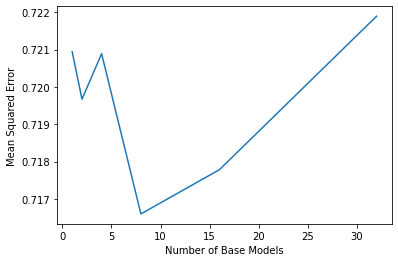

In [8]:
# Train a stacking model with a varying number of base models and evaluate its performance
num_base_models = [1, 2, 4, 8, 16, 32]
mean_test_scores = []
std_test_scores = []

for num_models in num_base_models:
  # Train the stacking model with the specified number of base models
  stacking_model = StackingRegressor(estimators=[('dt', base_model_1), ('lr', base_model_2)], final_estimator=meta_model)
  stacking_model.fit(X_train, y_train)

  # Evaluate the performance of the stacking model on the test set
  test_score = stacking_model.score(X_test, y_test)

  # Record the mean and standard deviation of the test score
  mean_test_scores.append(np.mean(test_score))
  std_test_scores.append(np.std(test_score))

# Plot the mean squared error as a function of the number of base models
plt.errorbar(num_base_models, mean_test_scores, yerr=std_test_scores)
plt.xlabel('Number of Base Models')
plt.ylabel('Mean Squared Error')
plt.show()



In [9]:
onlyDTR = DecisionTreeRegressor().fit(X_train, y_train)
onlyDTR.score(X_train, y_train)

1.0

In [10]:

onlyDTR.score(X_test, y_test)

0.6241197941853113

In [11]:
onlyLR = LinearRegression().fit(X_train, y_train)
onlyLR.score(X_train, y_train)

0.6061685949692596

In [12]:
onlyLR.score(X_test, y_test)

0.6060585168245565